# UCK 358E – Introduction to Artificial Intelligence 
## Homework 1
## Deadline: April 07, 2024




#### Name: Yasin Akdemir
#### Student Number: 110210072

### In this homework, you will focus on predicting type of trees in a forest. There are 7 different tree types in the dataset, the label is named as "Cover_Type" and you will train models to predict the correct type for the test data. Each section below contains clear explanations about the tasks. It is not required to write a separate report for the homework. Make all of your explanations and discussions inside the Jupiter Notebook. Use the Notebook as your report. Be aware that If you deliver a Notebook containing only codes without explanation and discussion, you will lose majority of your points. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## import any library that you will use


# Load Data (don't change anything in this part, just run it) 

In [11]:
df = pd.read_csv("datasetHW.csv")
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [12]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [13]:
df_new = df[["Elevation", "Hillshade_9am", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points", "Cover_Type"]]
X = df_new.drop(["Cover_Type" ], axis=1)
y = df_new[["Cover_Type"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # don't change random state

In [14]:
X_train

,Elevation,Hillshade_9am,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
765,2916,202,67,1507
5927,2356,247,210,1050
14032,2977,195,696,878
6187,2415,131,108,638
3872,2299,167,497,1159
...,...,...,...,...
5191,2189,254,0,525
13418,2317,229,0,560
5390,2962,237,95,470
860,2898,204,30,1552


In [15]:
filter_col = [col for col in df if col.startswith('Soil_Type')]
X2 = df[filter_col]
y2 = df[["Cover_Type"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42) # don't change random state

In [16]:
X_train2

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5927,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6187,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3872,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color='red'>  In part a and part b, use (X_train, y_train) for training and (X_test, y_test) for testing your model. Don't use (X_test, y_test) during training or validation. </font>

## <font color='red'> In part c, use (X_train2, y_train2) for training and (X_test2, y_test2) for testing your model. X_train2 only contains categorical features. </font>

## Part a) you have four features to train a model. You will train linear regression and logistic regression models. You are free to use sklearn in this part 

### a1) Train linear regression model with and without normalizing your data (X_train). Try to figure out whether there is overfitting or underfitting. (Remember linear regression is for regression tasks, you need to round the prediction to use it for classification tasks) 

In [8]:
# Linear regression using sklearn and without normalization

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 1  # We can change this to change our degree of polynomial feature


model = make_pipeline(PolynomialFeatures(degree), LinearRegression()) # Createing a pipeline for polynomial features and linear regression


model.fit(X_train, y_train) # Training the data with training samples


predictions = model.predict(X_test) # Making predictions with testing samples


rounded_predictions = predictions.round().astype(int) # As mentioned in the question, we have to round prediction values for classiffication tasks, we round to the closest integer

from sklearn.metrics import accuracy_score # This is imported to calculate accuracy score


accuracy_with_rounding = accuracy_score(y_test, rounded_predictions)# This line gets the accuracy score

print("Accuracy :", accuracy_with_rounding)
print("Coefficients:", model.named_steps['linearregression'].coef_)# Printing coefficents to discuss later


Accuracy : 0.1457231040564374
Coefficients: [[ 0.          0.00035535 -0.00017653 -0.00022979 -0.00021815]]


In [17]:
# Linear regression using sklearn and with normalization

degree = 1  # We can change this to change our degree of polynomial feature

from sklearn.preprocessing import StandardScaler # StandartScaler scales data, after scaling our data will have zero mean and unit variance. reference: https://scikit-learn.org/stable/modules/preprocessing.html

model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression()) # With pipeline we add scaler to the model


model.fit(X_train, y_train) # Training the data with training samples


predictions = model.predict(X_test) # Making predictions with testing samples


rounded_predictions = predictions.round().astype(int) # As mentioned in the question, we have to round prediction values for classiffication tasks, we round to the closest integer

from sklearn.metrics import accuracy_score # This is imported to calculate accuracy score


accuracy_with_rounding = accuracy_score(y_test, rounded_predictions) # This line gets the accuracy score

print("Accuracy with rounding:", accuracy_with_rounding)


print("Coefficients:", model.named_steps['linearregression'].coef_) # Printing coefficents to discuss later


# After normalization we see no big difference in accuracy scores.


Accuracy with rounding: 0.1457231040564374
Coefficients: [[ 0.          0.1478475  -0.00539574 -0.04802813 -0.24036161]]


In [88]:
#To discuss about overfitting, we can look at the accuracy score with different samples(test and train). If model gets high accuracy with train data and low accuracy with test data, model is overfitted.
#In our situation, with polynomial degree of 1 we get an underfit because of low accuracy score, but if we change our models degree to 9 in the code above and run the cells again, we get really high difference(test accuracy = -0.2628121180694565, train accuracy= 0.5352835968280105)
#between test and train data accuracy score, in the situation of 9th degree polynomial we get overfit.

accuracy_with_test_data = model.score(X_test, y_test)# this two lines gets the accuracy score without rounding  for models(slightly wrong because of not rounding)
accuracy_with_train_data = model.score(X_train, y_train)

print("Accuracy with test data :", accuracy_with_test_data)# We are looking for difference here
print("Accuracy with train data:", accuracy_with_train_data)

Accuracy with test data : 0.013110455400892174
Accuracy with train data: 0.01196630828375067


### a2) Train logistic regression model with and without normalizing your data (X_train). Try to figure out whether there is overfitting or underfitting. Also plot confusion matrix and make a discussion on it. Compare the result with part a1. 

C:\Users\yasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.37433862433862436


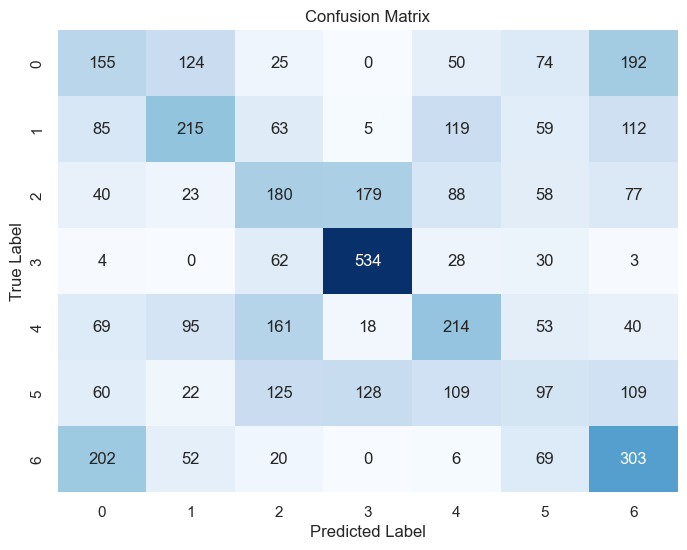

In [18]:
# Logistic regression using sklearn and without normalization
from sklearn.linear_model import LogisticRegression


logistic_model = LogisticRegression() # Createing a logistic regression model


logistic_model.fit(X_train, y_train) # Training the data with training samples


predictions = logistic_model.predict(X_test) # Making predictions with testing samples


accuracy = accuracy_score(y_test, predictions) # Calculating the accuracy score

print("Accuracy:", accuracy) # printing the result 0.37433862433862436

conf_matrix = confusion_matrix(y_test, predictions) # creating confusion matrix


plt.figure(figsize=(8, 6)) # Plotting size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False) # creating heatmap from seaborn
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

C:\Users\yasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6038359788359788


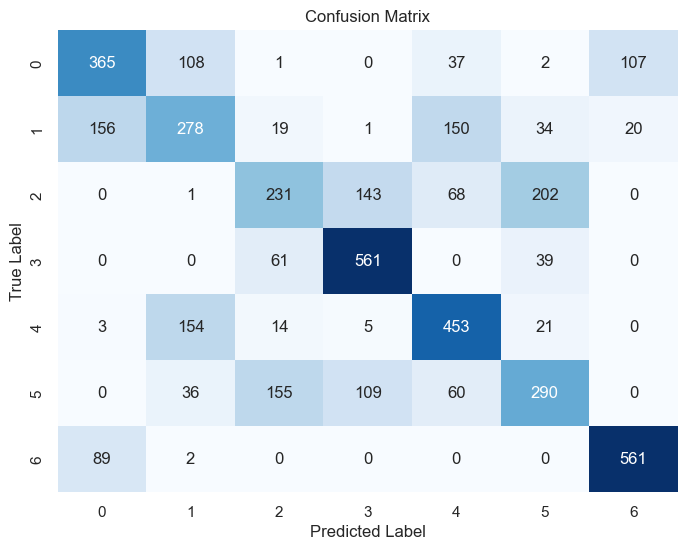

In [19]:
# Linear regression using sklearn and with normalization
from sklearn.preprocessing import StandardScaler # StandartScaler scales data, after scaling our data will have zero mean and unit variance. reference: https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.linear_model import LogisticRegression


logistic_model = make_pipeline(StandardScaler(), LogisticRegression()) # Createing a logistic regression model with normalization


logistic_model.fit(X_train, y_train)


predictions = logistic_model.predict(X_test) # Making predictions with testing samples


accuracy = accuracy_score(y_test, predictions) # Calculating accuracy

print("Accuracy:", accuracy) # printing the result 0.6038359788359788


conf_matrix = confusion_matrix(y_test, predictions) # creating confusion matrix


plt.figure(figsize=(8, 6)) # Plotting size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False) # creating heatmap from seaborn
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# After normalization we get a better accuracy result in logistic regression from 0.37433862433862436 to 0.6038359788359788

# For logistic regression we dont get a bad result like linear regression, from the results we can not say it is overfitted, but we get a little bit of underfitting because of low accuracy scores.


### a3) You only have access to four features (as presented in X_train). What are you suggesting to improve the logistic regression's model accuracy? Implement the proposed approach and compare the result with part a2

In [20]:
# Without adding another feature we can improve the model with feature engineering. We can create new features with features we already have.


new_column_values = X_train.iloc[:, 2] - X_train.iloc[:, 3]# 3rd and 4th data columns are containing slightly opposing information(fire-water), we can use difference of them to crate new feature.

new_column_values2 = X_test.iloc[:, 2] - X_test.iloc[:, 3]# Create the same new feature for test data too

new_data = pd.DataFrame({'New_Column': new_column_values}, index=X_train.index) # We are creating new column in a new dataframe for training
new_data2 = pd.DataFrame({'New_Column': new_column_values2}, index=X_test.index)# We are creating new column in a new dataframe for testing


X_train_combined = pd.concat([X_train, new_data], axis=1) # Now we concatenate the new column with original train data
X_test_combined = pd.concat([X_test, new_data2], axis=1) # Now we concatenate the new column with original test data
#print(X_train_combined)

logistic_model2 = make_pipeline(StandardScaler(), LogisticRegression()) # We create the model with normalization


logistic_model2.fit(X_train_combined, y_train) # training the model

# Make predictions on the test data
predictions = logistic_model2.predict(X_test_combined) # Making predictions on the test data


accuracy = logistic_model2.score(X_test_combined, y_test) # We get the new accuracy score of 0.6044973544973545 which is slightly improved than a2
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, predictions)

Accuracy: 0.6044973544973545


C:\Users\yasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Part b) Again you have four features to train a model. You will train linear regression and logistic regression models. But, in this time, you need to develop your algorithm from scratch without using a library such as sklearn. (You can benefit from the codes available in ninova)

### b1) Implement linear regression and logistic regression from scratch and train models for your problem. Give comments in each line of your algorithms to explain what is this line for. Compare your result with a1, a2. 

In [21]:
# This cell contains linear regression from scratch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

df = pd.read_csv("datasetHW.csv")

df.columns

df_new = df[["Elevation", "Hillshade_9am", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points", "Cover_Type"]]
X = df_new.drop(["Cover_Type" ], axis=1)
y = df_new[["Cover_Type"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # don't change random state

filter_col = [col for col in df if col.startswith('Soil_Type')]
X2 = df[filter_col]
y2 = df[["Cover_Type"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42) # don't change random state

# code above is default from homework
# This cell contains linear regression

np_x_train = X_train.values # First I transform the dataframes into numpy arrays to avoid further problems
np_y_train = y_train.values # Train y values also transformed
np_y_train_Transposed = np_y_train.T # I created this in case of need later
np_x_test = X_test.values # Test x values  transformed
np_y_test = y_test.values # Test y values also transformed
#print(np_x_train)
#print(np_y_train_Transposed)

def featureNormalize(X): # This function normalizes the data given as parameter
    mu = np.mean(X, axis=0) # mu value is mean of the data
    sigma = np.std(X, ddof=1, axis=0) # sigma is standard deviation of data
    X_norm = (X - mu) / sigma # Normalization process
    return X_norm, mu, sigma # returning results

Normalised_x_train, mu , sigma = featureNormalize(np_x_train) # We normalilze our x train data and save it to Normalised_x_train variable

#print(Normalised_x_train)

def computeCostMulti(X, y, theta): # This function is also from Ninova files it calculates Cost function for Multi variable situations
    h = np.dot(X, theta) - y # This is our hypothesis
    J = np.dot(h.T, h) / (2 * X.shape[0]) # This is cost function which we will minimize later
    return J

def gradientDescentMulti(X, y, alpha, num_iters):
    m = X.shape[0]  # Number of training examples
    n = X.shape[1]  # Number of features including intercept
    theta = np.zeros((n, 1))  # Initialize theta variableas a column vector to make it multiplicable
    J_history = np.zeros(num_iters)# Initialize cost variable
    for i in range(num_iters): # For loop to gradient descenting
        h = np.dot(X, theta) # This is our hypothesis
        theta = theta - (alpha / m) * np.dot(X.T, h - y) # Gradient descent
        J_history[i] = computeCostMulti(X, y, theta) # Saving cost values
    return theta, J_history

intercept_column = np.ones((Normalised_x_train.shape[0], 1)) # This column will be added to original train array
X_with_intercept = np.hstack((intercept_column, Normalised_x_train)) # Value of 1 as column is added to the training x values to calculate intercept value as well

alpha = 0.1 # Learning rate for gradient descent
num_iters = 400 # Iterations for gradient descent
theta, J_history = gradientDescentMulti(X_with_intercept, np_y_train, alpha, num_iters) # Calculating theta coefficents for our model with gradient descent

print("Calculated coefficents :", theta.T) # We can see we get really close coefficents with sklearn library [[ 3.99196901  0.14785448 -0.00539599 -0.0480304  -0.24037297]]


normalised_x_test, mu2 , sigma2 = featureNormalize(np_x_test) # We normalilze our x test data and save it to normalised_x_test variable


predictions = theta[0] + theta[1]*normalised_x_test[:,0] + theta[2]*normalised_x_test[:,1] + theta[3]*normalised_x_test[:,2] + theta[4]*normalised_x_test[:,3] # We use the hypothesis to predict

#print(predictions)

rounded_predictions = predictions.round().astype(int) # As mentioned in the question, we have to round prediction values for classiffication tasks, we round to the closest integer

from sklearn.metrics import accuracy_score # I am using sklearn library only for comparison on equal terms

accuracy_with_rounding = accuracy_score(np_y_test, rounded_predictions) # Getting the accuracy score

print("Accuracy score :", accuracy_with_rounding)

# We get almost same accuracy score(and almost same coefficents) with part a1 and we get worse score than part a2


Calculated coefficents : [[ 3.99196901  0.14785448 -0.00539599 -0.0480304  -0.24037297]]
Accuracy score : 0.1457231040564374


In [22]:
# This cell contains logistic regression from scratch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score





df = pd.read_csv("datasetHW.csv")
#df.head()

df.columns

df_new = df[["Elevation", "Hillshade_9am", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points", "Cover_Type"]]
X = df_new.drop(["Cover_Type" ], axis=1)
y = df_new[["Cover_Type"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # don't change random state

filter_col = [col for col in df if col.startswith('Soil_Type')]
X2 = df[filter_col]
y2 = df[["Cover_Type"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42) # don't change random state

# code above is default from homework
# This cell contains logistic regression

np_x_train = X_train.values # First I transform the dataframes into numpy arrays to avoid further problems
np_y_train = y_train.values # Train y values also transformed
np_y_train_Transposed = np_y_train.T # I created this in case of need later

np_x_test = X_test.values # Test x values  transformed
np_y_test = y_test.values  # Test y values also transformed



def featureNormalize(X): # This function normalizes the data given as parameter
    mu = np.mean(X, axis=0) # mu value is mean of the data
    sigma = np.std(X, ddof=1, axis=0) # sigma is standard deviation of data
    X_norm = (X - mu) / sigma # Normalization process
    return X_norm, mu, sigma # returning results


Normalised_x_train, mu , sigma = featureNormalize(np_x_train) # We normalilze our x train data and save it to Normalised_x_train variable
normalised_x_test, mu2 , sigma2 = featureNormalize(np_x_test) # We normalilze our x test data and save it to normalised_x_test variable
intercept_column = np.ones((Normalised_x_train.shape[0], 1)) # This column will be added to original train array
X_with_intercept = np.hstack((intercept_column, Normalised_x_train)) # Value of 1 as column is added to the training x values to calculate intercept value as well


theta = np.zeros(5) # Creating array for coefficents



def sigmoid(z): # this is sigmoid function which will be used on logistic regression
    return 1 / (1 + np.exp(-z))

def costFunctionSigmoid(theta, X, y): # This funstion is for calculating sigmoid cost function
    h = sigmoid(np.dot(X, theta)) # This is our hypothesis for logistic regression which consists sigmoid function
    h = h.reshape(-1, 1)  # To continue with matrix multiplication
    J = -(np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) / X.shape[0] # This is cost value
    grad = np.dot(X.T, h - y) / X.shape[0] # Gradient value
    return J, grad



def gradientDescentMultiSigmoid(X, y, alpha, num_iters):
    m = X.shape[0]  # Number of training examples in given X
    n = X.shape[1]  # Number of features including intercept in given X
    theta = np.zeros((n, 1))  # Initialize theta as a column vector to make it multiplicable
    J_history = np.zeros(num_iters) # Initialize cost variable
    for i in range(num_iters): # For loop to gradient descenting
        h = sigmoid(np.dot(X, theta)) # This is our hypothesis for logistic regression which consists sigmoid function
        theta = theta - (alpha / m) * np.dot(X.T, h - y) # Gradient descent
    return theta

alpha = 0.1 # Learning rate for gradient descent
num_iters = 1000 # Iterations for gradient descent higher values improve accuracy up to 0.55 but costs time


# Before calculating the coefficents for our model we have to change our Y axis values since we are doing multi-Class classification with sigmoid function.
# Sigmoid function will always give values between 0 and 1 and it will work fine with 2 classes.
# In our case we have to make binary classes for every tree type from 1 to 7.
# The code below creates 7 binary classes which contains 1 values if the tree type of that index is the target tree type.
# After that I will train 7 different models. With this approach, it can be predicted which tree each index is by comparing the probabilities from each of 7 different model predictions..



target = 1 # This is just indicator
binary_class_1 = np.where(np_y_train == target, 1, 0)# This line creates binary array of type = 1 trees
binary_class_2 = np.where(np_y_train == 2, 1, 0)# This line creates binary array of type = 2 trees
binary_class_3 = np.where(np_y_train == 3, 1, 0)# This line creates binary array of type = 3 trees
binary_class_4 = np.where(np_y_train == 4, 1, 0)# This line creates binary array of type = 4 trees
binary_class_5 = np.where(np_y_train == 5, 1, 0)# This line creates binary array of type = 5 trees
binary_class_6 = np.where(np_y_train == 6, 1, 0)# This line creates binary array of type = 6 trees
binary_class_7 = np.where(np_y_train == 7, 1, 0)# This line creates binary array of type = 7 trees



theta_new1 = gradientDescentMultiSigmoid(X_with_intercept,binary_class_1,alpha , num_iters) #Creating coefficents for type = 1 trees using its binary class and X_with_intercept variable
#print(theta_new1)

theta_new2 = gradientDescentMultiSigmoid(X_with_intercept,binary_class_2,alpha , num_iters) #Creating coefficents for type = 2 trees using its binary class and X_with_intercept variable
#print(theta_new2)

theta_new3 = gradientDescentMultiSigmoid(X_with_intercept,binary_class_3,alpha , num_iters) #Creating coefficents for type = 3 trees using its binary class and X_with_intercept variable
#print(theta_new3)

theta_new4 = gradientDescentMultiSigmoid(X_with_intercept,binary_class_4,alpha , num_iters) #Creating coefficents for type = 4 trees using its binary class and X_with_intercept variable
#print(theta_new4)

theta_new5 = gradientDescentMultiSigmoid(X_with_intercept,binary_class_5,alpha , num_iters) #Creating coefficents for type = 5 trees using its binary class and X_with_intercept variable
#print(theta_new5)

theta_new6 = gradientDescentMultiSigmoid(X_with_intercept,binary_class_6,alpha , num_iters) #Creating coefficents for type = 6 trees using its binary class and X_with_intercept variable
#print(theta_new6)

theta_new7 = gradientDescentMultiSigmoid(X_with_intercept,binary_class_7,alpha , num_iters) #Creating coefficents for type = 7 trees using its binary class and X_with_intercept variable
#print(theta_new7)   

def predict(theta, X): # This is function for prediction
    prob = sigmoid(np.dot(X, theta)) # Prediction using sigmoid function
    return (prob >= 0.5).astype(int) , prob# Returning rounded probabilites and probabilities

intercept_column2 = np.ones((normalised_x_test.shape[0], 1)) # This column will be added to original test array
X_test_with_inercept = np.hstack((intercept_column2, normalised_x_test)) # Value of 1 as column is added to the training x values to calculate prediction

val1 , prob1= predict(theta_new1,X_test_with_inercept) # Predicting rounded value as val and probabiliy as prob using theta_new variables calculated specially for tree type =1
val2 , prob2= predict(theta_new2,X_test_with_inercept) # Predicting rounded value as val and probabiliy as prob using theta_new variables calculated specially for tree type =2
val3 , prob3= predict(theta_new3,X_test_with_inercept) # Predicting rounded value as val and probabiliy as prob using theta_new variables calculated specially for tree type =3
val4 , prob4= predict(theta_new4,X_test_with_inercept) # Predicting rounded value as val and probabiliy as prob using theta_new variables calculated specially for tree type =4
val5 , prob5= predict(theta_new5,X_test_with_inercept) # Predicting rounded value as val and probabiliy as prob using theta_new variables calculated specially for tree type =5
val6 , prob6= predict(theta_new6,X_test_with_inercept) # Predicting rounded value as val and probabiliy as prob using theta_new variables calculated specially for tree type =6
val7 , prob7= predict(theta_new7,X_test_with_inercept) # Predicting rounded value as val and probabiliy as prob using theta_new variables calculated specially for tree type =7


binary_arrays = [val1, val2, val3, val4, val5, val6, val7] # Binary arrays



combined_array = np.zeros_like(val1) # Creating array for combinated arrays which will be calculated below, same size as val variables.


for i in range(len(val1)): # This for loop is to find which tree type get the highest probability in each index
    max_prob = 0 # Variable for max store max probability
    selected_class = 0 # Holds the current tree type
    for j, prob in enumerate([prob1, prob2, prob3, prob4, prob5, prob6, prob7]):
        if prob[i] > max_prob:
            max_prob = prob[i] # Finding highest probability
            selected_class = j + 1  
        combined_array[i] = selected_class # Saving the class with highest probability and saving the type of it to the combined array. For example if the 6th probability is the highest, combined array will store 6 at that index.




from sklearn.metrics import accuracy_score # I am using sklearn library only for comparison on equal terms

accu = accuracy_score(np_y_test, combined_array) # Getting the accuracy score

print("Accuracy:", accu)


# With this code we get better accuracy than a1 and worse than a2. We get better score from a1 because a1 uses linear regression which has poor classification performance



Accuracy: 0.5264550264550265


### b2) Try to figure out why the model accuracies of linear regression and logistic regression are too different by analyzing your code. And emphasize the main assumption and corresponding line in your code that lead to performance change. 

In [94]:
# Main reason of linear regression and logistic regression having different accuracies is their hypotheses, logistic regression uses sigmoid function and linear regrrssion uses linear system to predict values.

In [63]:
def sigmoid(z): # this is sigmoid function which will be used on logistic regression.
    return 1 / (1 + np.exp(-z))

#h = np.dot(X, theta) # This is the hypothesis used liner regression which is linear equation.

## Part c) This time, you have a different dataset with categorical features to train a model (X_train2, y_train2). You need to write decision tree algorithm that we presented in the lecture from scratch without using any library.  

### c1) Implement decision tree algorithm (with categorical features (C4.5)) from scratch and train a model for your problem. Give comments in each line of your algorithm to explain what is this line for. Train a model and present your result on test set. Try to figure out whether there is overfitting or underfitting. Plot feature importance for your model.

In [1]:
import numpy as np
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



df = pd.read_csv("datasetHW.csv")
#df.head()

df.columns

df_new = df[["Elevation", "Hillshade_9am", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points", "Cover_Type"]]
X = df_new.drop(["Cover_Type" ], axis=1)
y = df_new[["Cover_Type"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # don't change random state

filter_col = [col for col in df if col.startswith('Soil_Type')]
X2 = df[filter_col]
y2 = df[["Cover_Type"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42) # don't change random state

def CalcEntropy(self, y): # this func calculates Entropy
    classes = np.unique(y)
    entropy = 0
    for i in classes:
        p = np.mean(y == i)
        entropy -= p * np.log2(i)  # calculating entropy using the formula for entropy
    return entropy

### c2) Benefiting from the decision tree algorithm, implement random forest  algorithm from scratch and train a model for your problem. Give comments in each line of your algorithm to explain what is this line for. Train a model and present your result on test set. Try to figure out whether there is overfitting or underfitting. Compare your result with c1. Plot feature importance for your model

### c3) Assume you can add an additional feature to (X_train2, X_test2) from the features in "df" dataframe in the third line of this notebook. All features are listed in df.columns. Define a procedure to choose the feature that will maximize your model's accuracy. Define a procedure to present this feature as a categorical variable and add this discretized single feature into (X_train2, X_test2). Then train models with the developed algorithms in c1 and c2. Compare the obtained results with the results in c1, c2
